In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("CarPrice_Assignment.csv")
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data=data.drop(["car_ID"],axis=1)
data=data.drop(["symboling"],axis=1)
data=data.drop(["CarName"],axis=1)
data=data.drop(["fueltype"],axis=1)
data=data.drop(["doornumber"],axis=1)
data=data.drop(["carbody"],axis=1)
data=data.drop(["carheight"],axis=1)
data=data.drop(["enginetype"],axis=1)
data=data.drop(["cylindernumber"],axis=1)
data=data.drop(["stroke"],axis=1)
data=data.drop(["compressionratio"],axis=1)
data=data.drop(["peakrpm"],axis=1)
data=data.drop(["aspiration"],axis=1)

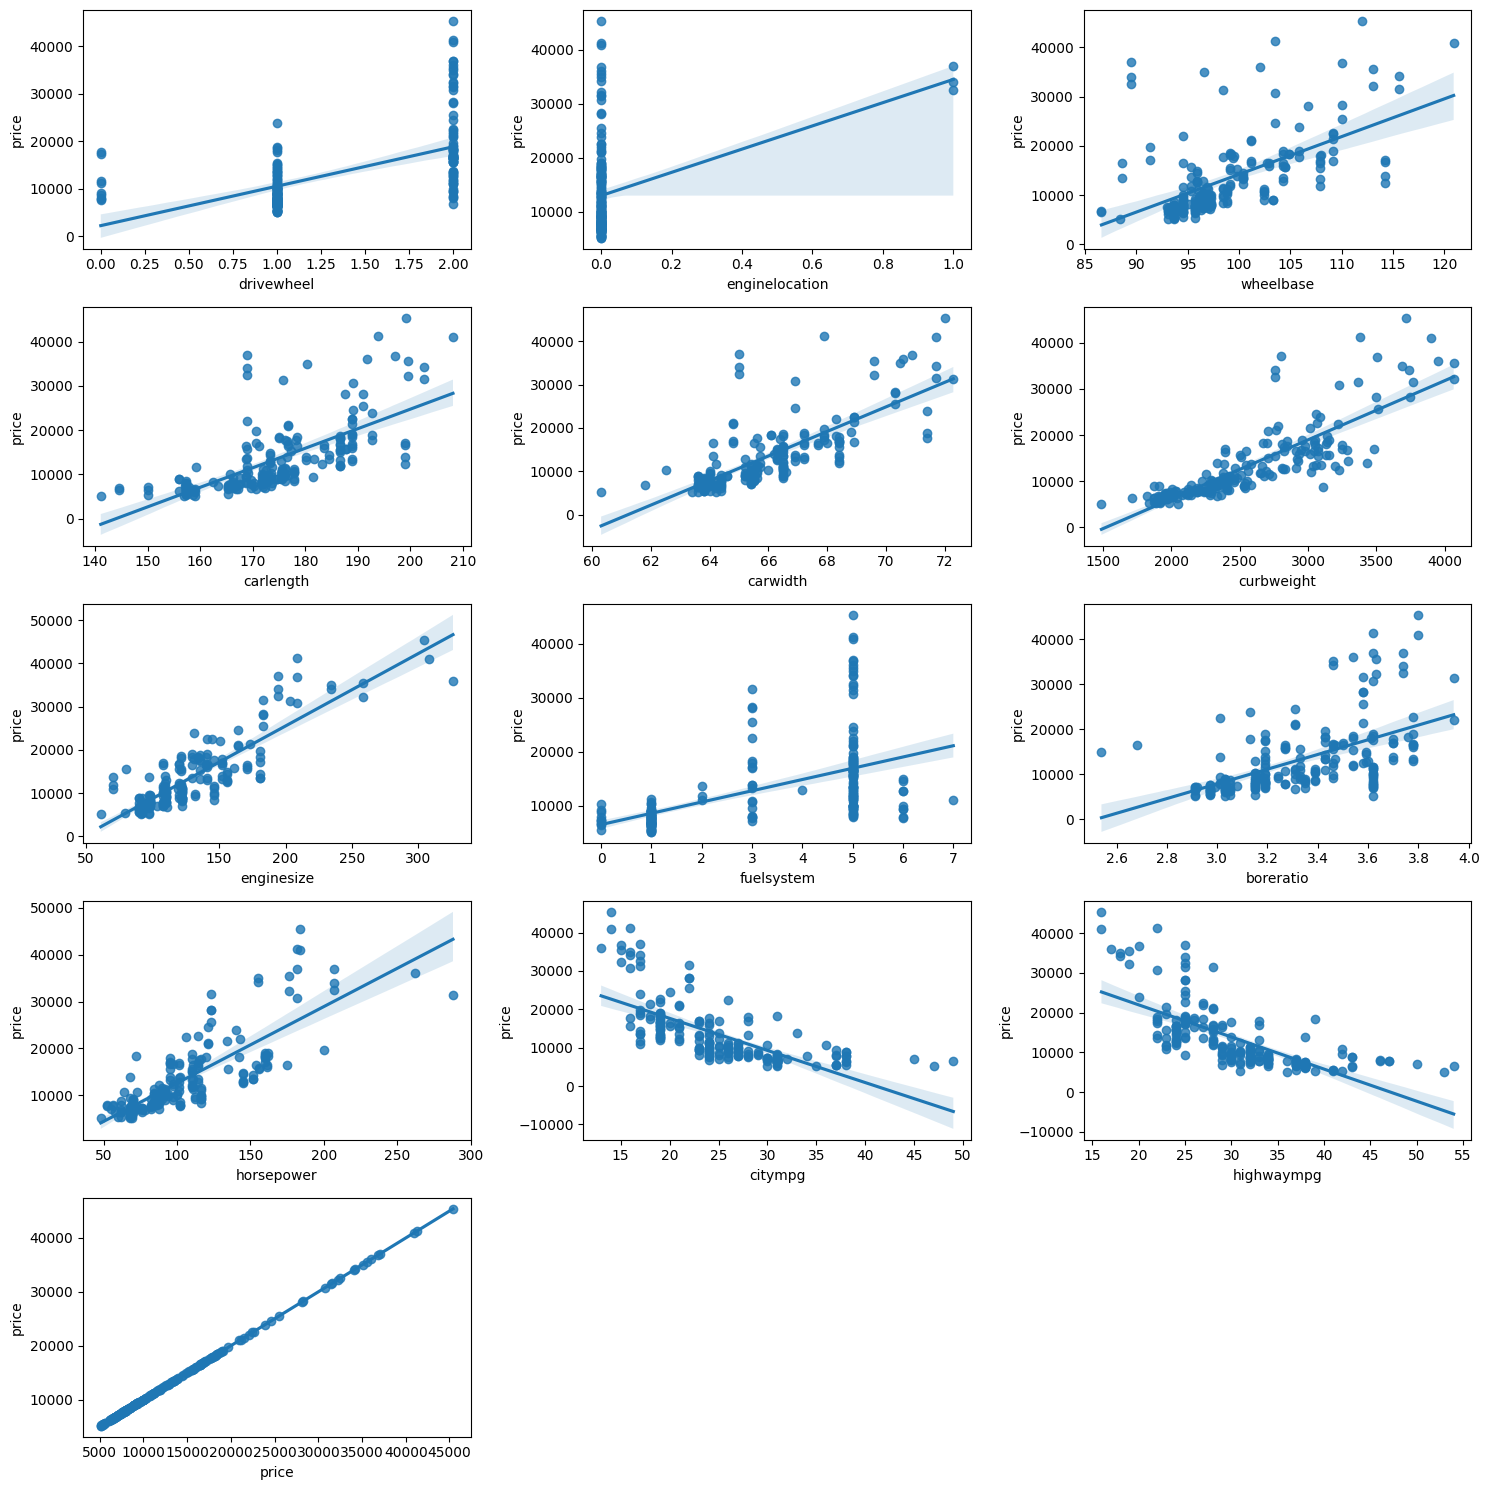

In [27]:
plt.figure(figsize=(15,15))
for i, feature in enumerate(data):
    plt.subplot(5,3,i+1)
    sns.regplot(x=feature,y="price",data=data)
plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
C_C=data.select_dtypes(include=["object"])
C_C

""
0
1
2
3
4
...
200
201
202
203


In [30]:
for column in C_C:
    data[column]=le.fit_transform(data[column])

In [31]:
data.head(5)

,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,2,0,88.6,168.8,64.1,2548,130,5,3.47,111,21,27,13495.0
1,2,0,88.6,168.8,64.1,2548,130,5,3.47,111,21,27,16500.0
2,2,0,94.5,171.2,65.5,2823,152,5,2.68,154,19,26,16500.0
3,1,0,99.8,176.6,66.2,2337,109,5,3.19,102,24,30,13950.0
4,0,0,99.4,176.6,66.4,2824,136,5,3.19,115,18,22,17450.0


<Axes: >

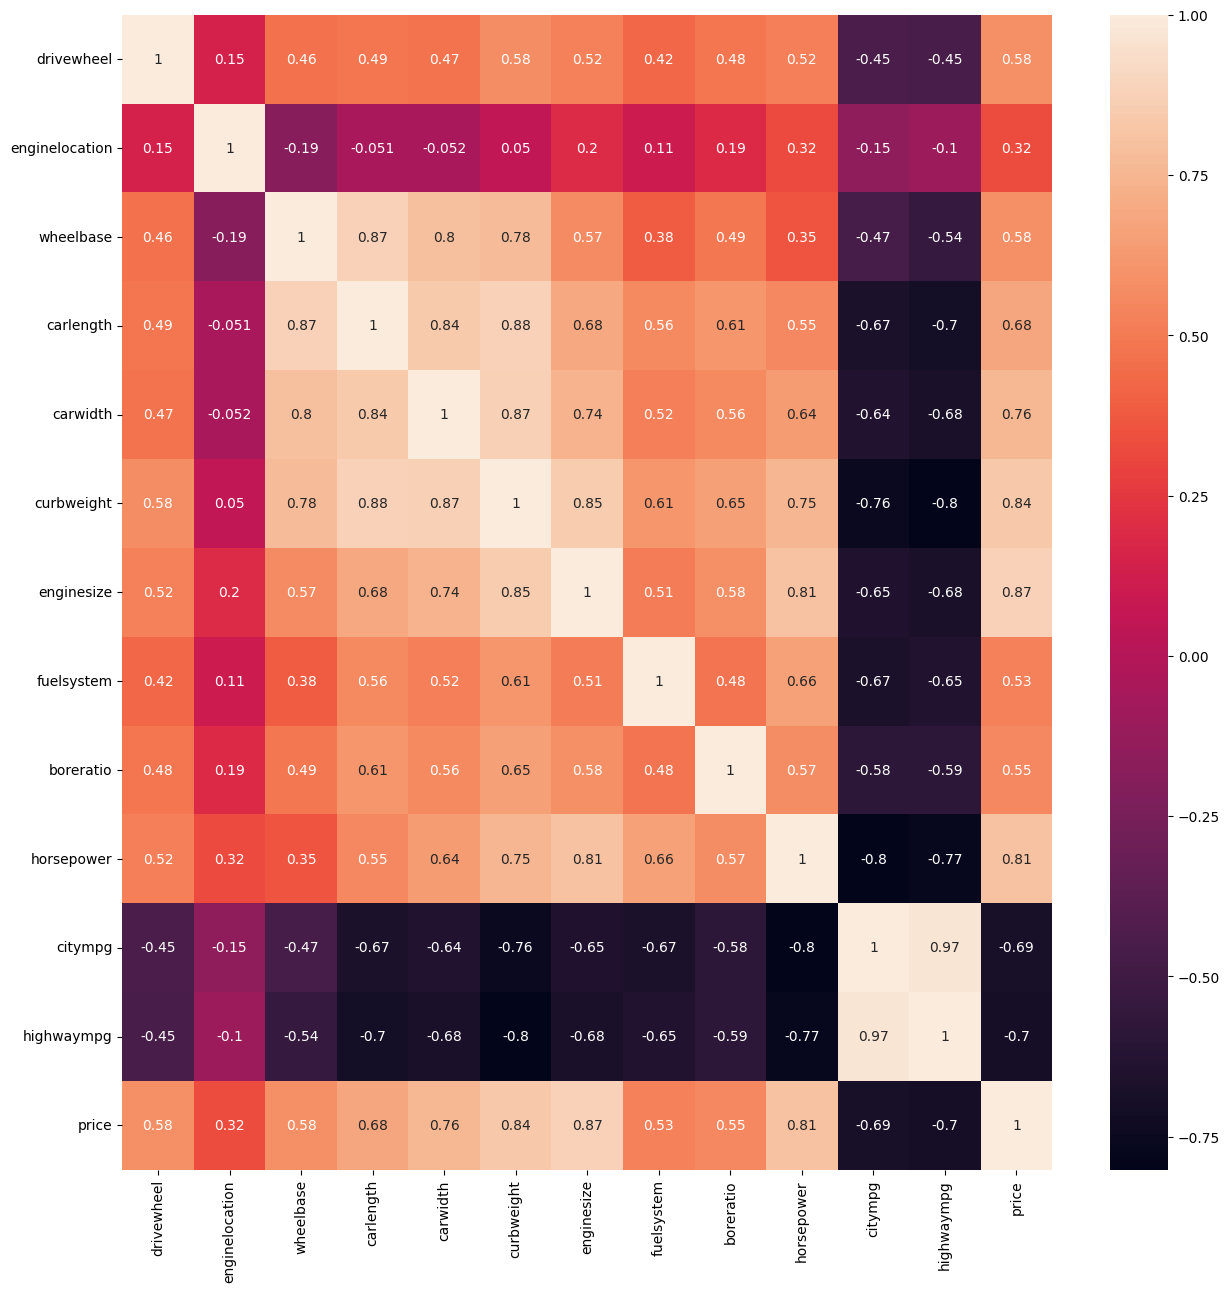

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=data.drop(["price"],axis=1)
y=data["price"]

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [36]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
L=Lasso()
parameter={"alpha":[0.01,0.1,1,10,100]}

In [37]:
Lassocv=GridSearchCV(L,parameter,scoring="r2",cv=5)

In [38]:
Lassocv.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [39]:
y_pred=Lassocv.predict(x_test_scaled)
y_pred

array([23432.19537496, 16494.98306756, 10540.11524576, 12993.37043927,
       24598.58283842,  6511.90669737,  7260.89380657,  7602.96690182,
        9978.36939578,  7736.2369659 , 15237.68484277,  8427.79907639,
       15105.28570747, 12257.95341782, 36761.48948999,  5865.78010676,
       -1940.01311904, 16466.3258552 , 11064.28207033,  9693.06270599,
       12034.98482331, 19392.70440371,  6477.69242581,  4310.45929236,
        6072.58175824, 24680.36800532, 14628.15774742, 16638.47828893,
        6527.30311958, 16429.77123238, 24196.56514752,  6034.94605952,
        5714.68117192, 21610.94324979,  8091.60024638, 24162.35087595,
        9387.73084776,  9716.11393785,  5225.4034319 , 16613.01747203,
        9384.33847333])

In [40]:
print(Lassocv.best_params_)
print(Lassocv.best_score_)

{'alpha': 100}
0.8489154524570266
